In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
df = pd.DataFrame({'h':[150,160,170,185,190],
                   'w':[50,58,70,80,90]})
df

,h,w
0,150,50
1,160,58
2,170,70
3,185,80
4,190,90


In [4]:
m=df.mean()
# print(m)
s=df.std()
print(s)
z = (df-m)/s
z.round(2)

h    16.733201
w    16.149303
dtype: float64


,h,w
0,-1.25,-1.21
1,-0.66,-0.72
2,-0.06,0.02
3,0.84,0.64
4,1.14,1.26


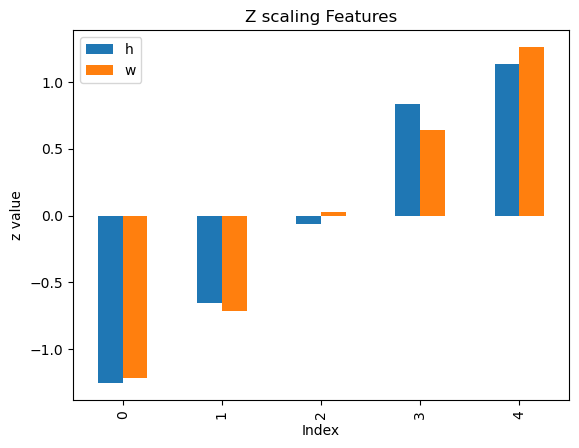

In [5]:
z.plot(kind='bar')
plt.title("Z scaling Features")
plt.xlabel("Index"); plt.ylabel('z value')
plt.show()

In [6]:
# ##Min–Max Scaling (Rescaling to [0,1]) 
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({'h':[150,175,170,180,190],
                   'w':[50,60,70,180,90]})
df

,h,w
0,150,50
1,175,60
2,170,70
3,180,180
4,190,90


In [7]:
#Step-1: Min, Max, Range
mn = df.min()
mx = df.max()
rg = mx - mn
mn,mx,rg

(h    150
 w     50
 dtype: int64,
 h    190
 w    180
 dtype: int64,
 h     40
 w    130
 dtype: int64)

In [8]:
#Step-2: Shift to zero
ss = df - mn
ss.head()

,h,w
0,0,0
1,25,10
2,20,20
3,30,130
4,40,40


In [9]:
#Step-3: Divide by range
mm = ss/rg
mm.round(2)

,h,w
0,0.00,0.00
1,0.62,0.08
2,0.50,0.15
3,0.75,1.00
4,1.00,0.31


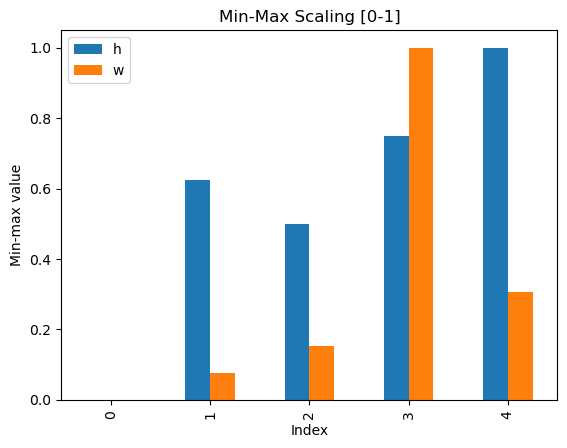

In [10]:
#Plot
mm.plot(kind='bar')
plt.title("Min-Max Scaling [0-1]")
plt.xlabel("Index"); plt.ylabel('Min-max value')
plt.show()

In [12]:
# Robust Scaling (Outlier-Resistant)
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({'h':[150,160,170,180,300],
                   'w':[50,60,70,80,200]})
df

,h,w
0,150,50
1,160,60
2,170,70
3,180,80
4,300,200


In [13]:
# step 1: median, quartiles, IQR
md = df.median()
q1 = df.quantile(.25)
q3 = df.quantile(.75)
iqr = q3-q1
md,q1,q3,iqr

(h    170.0
 w     70.0
 dtype: float64,
 h    160.0
 w     60.0
 Name: 0.25, dtype: float64,
 h    180.0
 w     80.0
 Name: 0.75, dtype: float64,
 h    20.0
 w    20.0
 dtype: float64)

In [14]:
# step 2: center by median
ct = df - md
ct

,h,w
0,-20.0,-20.0
1,-10.0,-10.0
2,0.0,0.0
3,10.0,10.0
4,130.0,130.0


In [15]:
# step 3: divide by IQR
rb = ct/iqr
rb.round(2)

,h,w
0,-1.0,-1.0
1,-0.5,-0.5
2,0.0,0.0
3,0.5,0.5
4,6.5,6.5


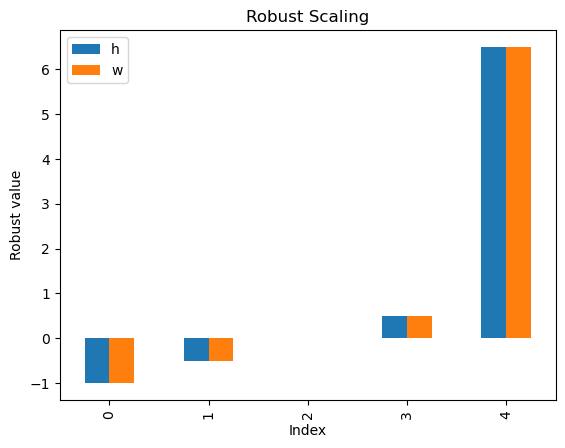

In [16]:
# visualize robust scaled values
rb.plot(kind='bar')
plt.title("Robust Scaling")
plt.xlabel("Index"); plt.ylabel('Robust value')
plt.show()

In [17]:
# standardization/z score
m = df.mean()
s = df.std()
z = (df - m) / s

# min max
mn = df.min()
mx = df.max()
mm = (df - mn) / (mx - mn)

# side-by-side
out = pd.concat([df,
                 z.add_prefix('z_'),
                 mm.add_prefix('mm_'),
                 rb.add_prefix('rb_')], axis=1)
out.round(2)

,h,w,z_h,z_w,mm_h,mm_w,rb_h,rb_w
0,150,50,-0.68,-0.68,0.00,0.00,-1.0,-1.0
1,160,60,-0.52,-0.52,0.07,0.07,-0.5,-0.5
2,170,70,-0.36,-0.36,0.13,0.13,0.0,0.0
3,180,80,-0.20,-0.20,0.20,0.20,0.5,0.5
4,300,200,1.76,1.76,1.00,1.00,6.5,6.5


In [22]:
# One-Hot Encoding 
import pandas as pd

df = pd.DataFrame({
    "id":[1,2,3,4],
    "color":["red","blue","green","red"],
    "size":["Small","Medium","Large","Medium"],
    "price":[10,12,15,11]
})

# Step 2: Apply one-hot encoding to the 'color' column
d_color = pd.get_dummies(df["color"], prefix="C", dtype = int)

# Step 3: Combine the new columns back with the original data
df_encoded = pd.concat([df,d_color], axis = 1)

# Step 4: Drop the old 'color' column if you no longer need it
df_encoded = df_encoded.drop("color", axis = 1)
print(df_encoded)

   id    size  price  C_blue  C_green  C_red
0   1   Small     10       0        0      1
1   2  Medium     12       1        0      0
2   3   Large     15       0        1      0
3   4  Medium     11       0        0      1


In [27]:
# Ordinal Encoding (for ordered categories) 
import pandas as pd

df = pd.DataFrame({
    "id":[1,2,3,4],
    "color":["red","blue","green","red"],
    "size":["Small","Medium","Large","Medium"],
    "price":[10,12,15,11]
})
df
# Step 2: declare the ordinal order
order = {"Small":1,"Medium":2,"Large":3}
# Step 3: convert the whole feature
# df["size_encoded"]=df["size"].map(order).astype(int)
df["size"]=df["size"].map(order).astype(int)
df

,id,color,size,price
0,1,red,1,10
1,2,blue,2,12
2,3,green,3,15
3,4,red,2,11


In [28]:
# Understanding Vectors, Dot Product, and Norms — A Hands-on Python Exploration 
#Step 1: Creating Vectors
import numpy as np

# Two tiny 3D vectors
a = np.array([2, 1, 3])
b = np.array([1, 3, 3])
print(a)
print(b)

[2 1 3]
[1 3 3]


In [29]:
#Step 2: Vector Operations (Addition and Subtraction)
add_ab = a + b
sub_ab = a - b
print(add_ab)
print(sub_ab)

[3 4 6]
[ 1 -2  0]


In [30]:
#Step 3: Dot Product (Similarity of Direction)
# Manual dot product: sum of pairwise products
dot = a[0]*b[0] + a[1]*b[1] + a[2]*b[2]

dot_np = a@b # np.dot(a,b)
print(dot)
print(dot_np)

14
14


In [31]:
#Step 4: Norms (Length or Magnitude of a Vector)
# L2 norm, the usual length
l2_a = np.linalg.norm(a)
print(l2_a)
l1_a = np.linalg.norm(a, ord = 1)
print(l1_a)

3.7416573867739413
6.0


In [32]:
#Step 5: Normalizing a Vector (Unit Vector)
unit_a = a/np.linalg.norm(a)
len_unit_a = np.linalg.norm(unit_a)
print(unit_a)
print(len_unit_a)

[0.53452248 0.26726124 0.80178373]
1.0


In [33]:
# Euclidean and Manhattan Distance
import numpy as np

X = np.array([
    [70, 80],  # S1
    [60, 90],  # S2
    [85, 60],  # S3
    [78, 76],  # S4
    [62, 65],  # S5
], dtype=float)

q = np.array([75, 70], dtype=float)

print("X shape:", X.shape)
print("q:", q.tolist())

X shape: (5, 2)
q: [75.0, 70.0]


In [34]:
# Euclidean distances (L2)
eu = np.linalg.norm(X - q, axis=1)
print("Euclidean:", np.round(eu, 3).tolist())

Euclidean: [11.18, 25.0, 14.142, 6.708, 13.928]


In [35]:
# Manhattan distances (L1)
ma = np.linalg.norm(X - q, ord=1, axis=1)
print("Manhattan:", ma.tolist())

Manhattan: [15.0, 35.0, 20.0, 9.0, 18.0]


In [ ]:
# Problem 1 — Scaling head-to-head
# You have Weight_kg = [58, 62, 65, 66, 190] and Height_cm = [150, 160, 170, 175, 180].
# Tasks:
#  a) Compute the Standardization for both features by hand on the first three values only.
#  b) Compute Min–Max Scaling to [0, 1] for all values.
#  c) Compute Robust Scaling for Weight_kg using median and IQR.
#  d) Which method handles the outlier in Weight_kg best and why?
import pandas as pd 
Weight_kg = [58, 62, 65, 66, 190]
Height_cm = [150, 160, 170, 175, 180]




# Problem 1 — Standardization (Z-score)
আমরা শুধু **প্রথম তিনটি** মান ব্যবহার করব।

## ✦ Data
- Weight = [58, 62, 65]
- Height = [150, 160, 170]

---

# 1) Mean (গড়) বের করা

### Weight mean
58 + 62 + 65 = 185  
185 / 3 = **61.67**

### Height mean
150 + 160 + 170 = 480  
480 / 3 = **160**

---

# 2) Standard Deviation (Std) বের করা  
(এখানে population std ধরা হয়েছে)

## Weight std

| Value | x - mean | (x - mean)² |
|-------|----------|-------------|
| 58 | -3.67 | 13.47 |
| 62 | 0.33 | 0.11 |
| 65 | 3.33 | 11.09 |

সবগুলো যোগ = 24.67  
24.67 / 3 = 8.22  
√8.22 = **2.87**

---

## Height std

| Value | x - mean | (x - mean)² |
|-------|----------|-------------|
| 150 | -10 | 100 |
| 160 | 0 | 0 |
| 170 | 10 | 100 |

সবগুলো যোগ = 200  
200 / 3 = 66.67  
√66.67 = **8.16**

---

# 3) Z-score (Standardization)

Z-score formula খুব সহজভাবে:

---

## ✦ Weight Z-scores

| Weight | Calculation | Z-score |
|--------|-------------|---------|
| 58 | (58 - 61.67) / 2.87 | **-1.28** |
| 62 | (62 - 61.67) / 2.87 | **0.12** |
| 65 | (65 - 61.67) / 2.87 | **1.16** |

---

## ✦ Height Z-scores

| Height | Calculation | Z-score |
|--------|-------------|---------|
| 150 | (150 - 160) / 8.16 | **-1.22** |
| 160 | (160 - 160) / 8.16 | **0.00** |
| 170 | (170 - 160) / 8.16 | **1.22** |

---

# ✔ Final Answer
- **Weight Z-scores:** [-1.28, 0.12, 1.16]  
- **Height Z-scores:** [-1.22, 0.00, 1.22]




In [8]:
#  b) Compute Min–Max Scaling to [0, 1] for all values.
import pandas as pd 
df = pd.DataFrame(
    {
        "Weight_kg":[58, 62, 65, 66, 190],
        "Height_cm":[150, 160, 170, 175, 180]

    }
)
mn = df.min()
mx = df.max()
mm = (df - mn) / (mx - mn)
out = pd.concat([df,mm.add_prefix('mm_')],axis=1)
out.round(2)


,Weight_kg,Height_cm,mm_Weight_kg,mm_Height_cm
0,58,150,0.00,0.00
1,62,160,0.03,0.33
2,65,170,0.05,0.67
3,66,175,0.06,0.83
4,190,180,1.00,1.00


In [11]:
 # c) Compute Robust Scaling for Weight_kg using median and IQR.

md = df.median()
qt1 = df.quantile(.25)
qt2 = df.quantile(.75)
iqr = qt2-qt1

cf = df - md 
ct = cf/iqr 
ct


,Weight_kg,Height_cm
0,-1.75,-1.333333
1,-0.75,-0.666667
2,0.00,0.000000
3,0.25,0.333333
4,31.25,0.666667


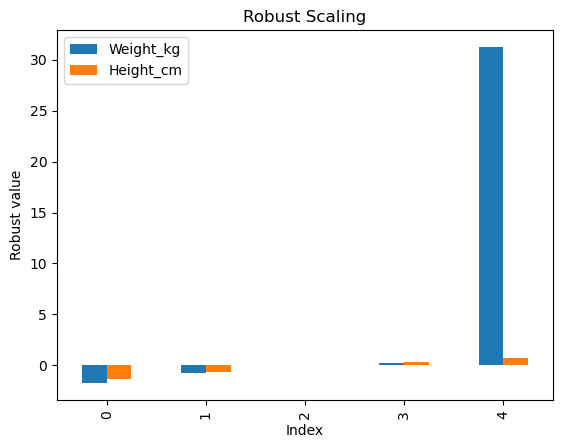

In [12]:
import matplotlib.pyplot as plt
# visualize robust scaled values
ct.plot(kind='bar')
plt.title("Robust Scaling")
plt.xlabel("Index"); plt.ylabel('Robust value')
plt.show()

# Robust Scaling — Best Method for Handling Outliers

Robust Scaling এমন একটি স্কেলিং পদ্ধতি যেখানে **median** এবং **IQR (Interquartile Range)** ব্যবহার করা হয়।  
এর সবচেয়ে বড় সুবিধা হলো — **outlier ডেটাকে খুব কম প্রভাব ফেলে**।

---

## ✔ Formula (Robust Scaler)

\[
x' = \frac{x - \text{median}}{IQR}
\]

Where:

- **median** = middle value  
- **IQR = Q3 - Q1**  
- **Q1** = 25th percentile  
- **Q3** = 75th percentile  

---

# 📌 Why Robust Scaling Handles Outliers Best?

### 1) Median outlier দ্বারা প্রায় প্রভাবিত হয় না  
Mean হঠাৎ বড় কোন মান (190 kg এর মতো) এলে টেনে উপরে উঠবে।  
কিন্তু **median বদলায় না**, তাই স্কেল স্থির থাকে।

### 2) IQR (Q3 – Q1) খুব stable  
IQR কেবল middle 50% data দেখে।  
Extreme মান (outlier) এখানে কোনো পরিবর্তন ঘটাতে পারে না।

### 3) Weighted ডেটা balance থাকে  
Outlier এর কারণে বাকি মানগুলো ছোট হয়ে যায় না— যেমন MinMax এ হয়।

---

# 📊 Example: Weight_kg = [58, 62, 65, 66, 190]

### Step 1 — Median  
Sorted: 58, 62, 65, 66, 190  
Median = **65**

### Step 2 — Quartiles  
- Q1 = 62  
- Q3 = 66  

IQR = Q3 – Q1 = **4**

---

# ✔ Robust Scaled Values

\[
x' = \frac{x - 65}{4}
\]

| Weight | Calculation | Robust Scaled |
|--------|-------------|----------------|
| 58 | (58 − 65) / 4 | -1.75 |
| 62 | (62 − 65) / 4 | -0.75 |
| 65 | (65 − 65) / 4 | 0.00 |
| 66 | (66 − 65) / 4 | 0.25 |
| 190 | (190 − 65) / 4 | 31.25 |

---

# 🏁 Conclusion
**Robust Scaling Weight_kg এর outlier 190 সবচেয়ে ভালোভাবে handle করে।**

কারণ:
- এটি median এবং IQR ব্যবহার করে → outlier প্রায় কোনোভাবে প্রভাব ফেলতে পারে না  
- অন্য স্কেলার (Z-score, MinMax) outlier এর কারণে distort হয়ে যায়  
- RobustScaler ডেটার মূল distribution ভালোভাবে ধরে রাখে  

---


# Problem 2 — When to Use Which Scaler

We have three features:

1. **Monthly_Income (BDT)** — a few extremely high earners (heavy outliers)  
2. **Room_Temperature_C** — range is stable (18–30), no outliers  
3. **Transaction_Count_Last_7_Days** — many zeros, few heavy shoppers (skewed + outliers)

---

# Part (a) — Best Scaler for Each Feature (1 sentence justification)

### ✔ 1) Monthly_Income → **Robust Scaler**  
Because income data has extreme outliers and RobustScaler (median + IQR) is least affected by them.

### ✔ 2) Room_Temperature_C → **Min–Max Scaler**  
Because temperature values stay in a fixed narrow range (18–30), so Min–Max gives clean 0–1 scaling without distortion.

### ✔ 3) Transaction_Count_Last_7_Days → **Standardization (Z-score)**  
Because the skewed distribution still keeps values small, and standardization helps center the data while keeping rare high counts meaningful.

---

# Part (b) — Quick Numeric Examples (Why the chosen scaler is safer)

---

## **1) Monthly_Income (BDT)**  
Data example:  [25,000, 30,000, 35,000, 40,000, 9,00,000] # outlier


### Why Robust Scaler is safer:
Robust Scaler uses median & IQR → outlier affects nothing.

**Robust Scaling:**
- Median = 35,000  
- IQR = 10,000  

Example transformation:  
- 25,000 → (25000 − 35000) / 10000 = **−1.0**  
- 900,000 → (900000 − 35000) / 10000 = **86.5**  

👉 Outlier remains large but **doesn’t squash small values**.

**Contrast (MinMax gets destroyed):**
- MinMax → 25,000 becomes **0.0**, 40,000 becomes **0.017**, everything goes near zero.  
→ **Interpretation lost**




<!-- https://docs.google.com/document/d/1i_RdiQyERSe_1jvptsvjiA6-iO98qjg6jMnIxjbSMGI/edit?tab=t.0 -->
<!-- Problem-3
Tasks:
 a) Mark which are nominal and which are ordinal.
 b) One-hot encode City by hand for the 4 rows. Use 0 and 1.
 c) Ordinal-encode Education_Level with High School=0, Bachelor=1, Master=2. -->

# Problem 3 — Nominal vs Ordinal and Encoding

Dataset:

| ID | City      | Education_Level | Satisfaction |
|----|-----------|-----------------|--------------|
| 1  | Dhaka     | High School     | Low          |
| 2  | Chattogram| Bachelor        | Medium       |
| 3  | Rajshahi  | Master          | High         |
| 4  | Dhaka     | Bachelor        | Medium       |

---

# Part (a) — Nominal vs Ordinal

| Feature           | Type       | Reason |
|-------------------|-----------|--------|
| **City**          | Nominal   | No natural ordering (Dhaka ≠ Chattogram ≠ Rajshahi) |
| **Education_Level** | Ordinal | Natural order (High School < Bachelor < Master) |
| **Satisfaction**  | Ordinal   | Natural order (Low < Medium < High) |

---

# Part (b) — One-hot Encode “City”

Cities present: **Dhaka, Chattogram, Rajshahi**

One-hot encoding:

| ID | City        | City_Dhaka | City_Chattogram | City_Rajshahi |
|----|-------------|------------|------------------|----------------|
| 1  | Dhaka       | 1          | 0                | 0              |
| 2  | Chattogram  | 0          | 1                | 0              |
| 3  | Rajshahi    | 0          | 0                | 1              |
| 4  | Dhaka       | 1          | 0                | 0              |

---

# Part (c) — Ordinal Encode Education_Level

Mapping:  
- **High School = 0**  
- **Bachelor = 1**  
- **Master = 2**

Result:

| ID | Education_Level | Encoded_Value |
|----|-----------------|----------------|
| 1  | High School     | 0 |
| 2  | Bachelor        | 1 |
| 3  | Master          | 2 |
| 4  | Bachelor        | 1 |

---

# ✔ Final Encoded Summary

| ID | City_Dhaka | City_Chattogram | City_Rajshahi | Edu_Level_Enc |
|----|------------|------------------|----------------|----------------|
| 1  | 1 | 0 | 0 | 0 |
| 2  | 0 | 1 | 0 | 1 |
| 3  | 0 | 0 | 1 | 2 |
| 4  | 1 | 0 | 0 | 1 |

---





In [17]:
import pandas as pd

# Create dataset
df = pd.DataFrame({
    "ID": [1, 2, 3, 4],
    "City": ["Dhaka", "Chattogram", "Rajshahi", "Dhaka"],
    "Education_Level": ["High School", "Bachelor", "Master", "Bachelor"],
    "Satisfaction": ["Low", "Medium", "High", "Medium"]
})

df

# One-hot encoding for City
city_encoded = pd.get_dummies(df["City"], prefix="City")

city_encoded

# Mapping for ordinal encoding
mapping = {"High School": 0, "Bachelor": 1, "Master": 2}

df["Edu_Level_Enc"] = df["Education_Level"].map(mapping)

df[["Education_Level", "Edu_Level_Enc"]]


# Final merged DataFrame
final_df = pd.concat([df, city_encoded], axis=1)

final_df




,ID,City,Education_Level,Satisfaction,Edu_Level_Enc,City_Chattogram,City_Dhaka,City_Rajshahi
0,1,Dhaka,High School,Low,0,False,True,False
1,2,Chattogram,Bachelor,Medium,1,True,False,False
2,3,Rajshahi,Master,High,2,False,False,True
3,4,Dhaka,Bachelor,Medium,1,False,True,False


In [18]:
# Problem 4 — Vectors, dot product, norms

import numpy as np

# Given vectors
a = np.array([3, -1, 2])
b = np.array([4, 0, -2])

# a) Dot product a · b
dot_product = np.dot(a, b)

# b) L1 norm of a (Manhattan norm)
l1_norm = np.linalg.norm(a, ord=1)

# L2 norm of a (Euclidean norm)
l2_norm = np.linalg.norm(a)

# Print results
print("a · b (dot product):", dot_product)
print("L1 norm of a:", l1_norm)
print("L2 norm of a:", l2_norm)


a · b (dot product): 8
L1 norm of a: 6.0
L2 norm of a: 3.7416573867739413


# Problem 5 — Euclidean vs Manhattan Distance in Practice

Given points:  
- P1 = (2, 3)  
- P2 = (5, 7)  
- P3 = (2, 10)

---

# Part (a) — Compute Euclidean and Manhattan distances for all pairs by hand

---

### 1) Distance between P1 and P2

- Differences:  
  \( \Delta x = 5 - 2 = 3 \)  
  \( \Delta y = 7 - 3 = 4 \)

- **Euclidean distance:**  
  \[
  d_E = \sqrt{3^2 + 4^2} = \sqrt{9 + 16} = \sqrt{25} = 5
  \]

- **Manhattan distance:**  
  \[
  d_M = |3| + |4| = 7
  \]

---

### 2) Distance between P1 and P3

- Differences:  
  \( \Delta x = 2 - 2 = 0 \)  
  \( \Delta y = 10 - 3 = 7 \)

- **Euclidean distance:**  
  \[
  d_E = \sqrt{0^2 + 7^2} = 7
  \]

- **Manhattan distance:**  
  \[
  d_M = |0| + |7| = 7
  \]

---

### 3) Distance between P2 and P3

- Differences:  
  \( \Delta x = 2 - 5 = -3 \)  
  \( \Delta y = 10 - 7 = 3 \)

- **Euclidean distance:**  
  \[
  d_E = \sqrt{(-3)^2 + 3^2} = \sqrt{9 + 9} = \sqrt{18} \approx 4.24
  \]

- **Manhattan distance:**  
  \[
  d_M = |{-3}| + |3| = 6
  \]

---

# Part (b) — Which metric changes more when a single coordinate has a large jump, and why?

- **Manhattan distance** changes more linearly because it sums absolute differences along each coordinate. A large jump in one coordinate adds that full amount directly to the Manhattan distance.

- **Euclidean distance** grows with the square root of the sum of squares, so large changes in one coordinate increase distance but less dramatically compared to Manhattan distance.

**Therefore, Manhattan distance changes more when a single coordinate jumps significantly.**

---

# Part (c) — Scale y-coordinate by factor 10 and recompute distance between P1 and P2

- Original points:  
  P1 = (2, 3) → scaled y: 3 × 10 = 30  
  P2 = (5, 7) → scaled y: 7 × 10 = 70

- Differences after scaling:  
  \( \Delta x = 5 - 2 = 3 \)  
  \( \Delta y = 70 - 30 = 40 \)

- New distances:

  - **Euclidean distance:**  
    \[
    d_E = \sqrt{3^2 + 40^2} = \sqrt{9 + 1600} = \sqrt{1609} \approx 40.12
    \]

  - **Manhattan distance:**  
    \[
    d_M = |3| + |40| = 43
    \]

---

### Intuition after scaling y-coordinate:

- The distance is now dominated by the y-coordinate difference because of the scaling.

- Both distances increased a lot, but the relative impact of the x-coordinate difference became negligible.

- This shows how scaling features affects distance metrics — **features with larger scale dominate the distance calculations**.

---

# Summary

| Pair | Euclidean (Original) | Manhattan (Original) | Euclidean (Scaled y) | Manhattan (Scaled y) |
|-------|---------------------|---------------------|---------------------|---------------------|
| P1-P2 | 5                   | 7                   | 40.12               | 43                  |
| P1-P3 | 7                   | 7                   | (Not asked)         | (Not asked)         |
| P2-P3 | 4.24                | 6                   | (Not asked)         | (Not asked)         |

---

Scaling features before distance calculation is important to maintain balanced contributions from all dimensions.

